<a href="https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

csv_filename = "../data/Traffic_Violations/Traffic_Violations.csv"
df = pd.read_csv(csv_filename)

In [2]:
df['Fatal'].value_counts()

Fatal
No     1879414
Yes        498
Name: count, dtype: int64

In [3]:
df.dropna(subset=['Description'], inplace=True)

In [4]:
df['Description'].value_counts()

Description
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                     156937
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                              84442
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                          55131
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND       49804
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                       47429
                                                                                                ...  
DRIVING VEH W/ TV-TYPE RECEIVING EQUIPTHAT IS ON AND VISIBLE TO THE DRIVER)ON HWY                   1
DRIVING VEHICLE IN EXCESS OF REASONABLE AND PRUDENT SPEED ON HIGHWAY 66/40 ZONE                     1
PARKING VEH. LEFT WHEELS TO CURB                                                                    1
DRIVE, ATTEMPT TO DRIVE VEH. WHILE IMPAIRED BY DRUG OR DRUG AND ALCOHO

In [5]:
Red_df = df[df['Description'].str.contains('red', case=False) & df['Description'].str.contains('stop', case=False)  & (df['Description'].str.contains('stop', case=False) | df['Description'].str.contains('flashing', case=False) | df['Description'].str.contains('lights', case=False) | df['Description'].str.contains('light', case=False) )]

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2948773616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Accident', data=Red_df, palette='muted')


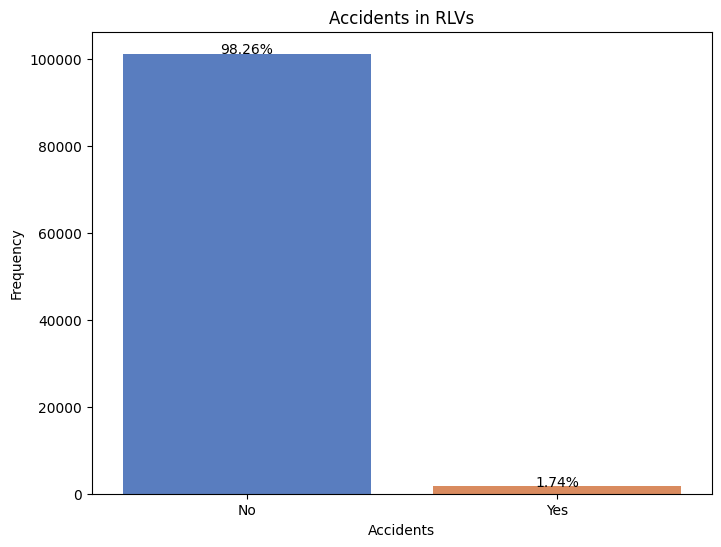

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Accident', data=Red_df, palette='muted')
total = len(Red_df)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Accidents')
plt.ylabel('Frequency')
plt.title('Accidents in RLVs')

plt.show()


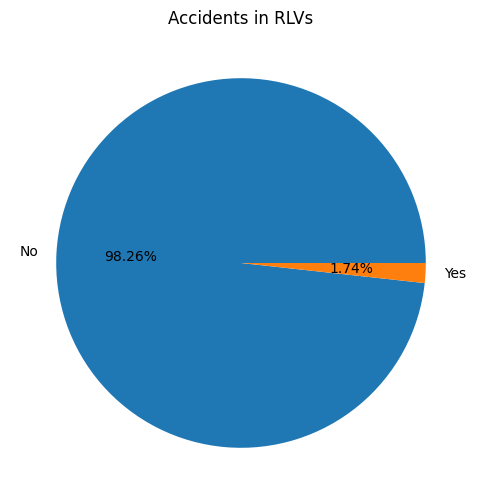

In [7]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(Red_df['Accident'].value_counts(), labels=Red_df['Accident'].value_counts().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Accidents in RLVs')
plt.show()

In [8]:
Red_df['Accident'].value_counts()

Accident
No     101152
Yes      1786
Name: count, dtype: int64

In [9]:
red_Accident=Red_df[Red_df['Accident'].str.contains('Yes', case=False)]

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\3875768131.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Personal Injury', data=red_Accident, palette='muted')


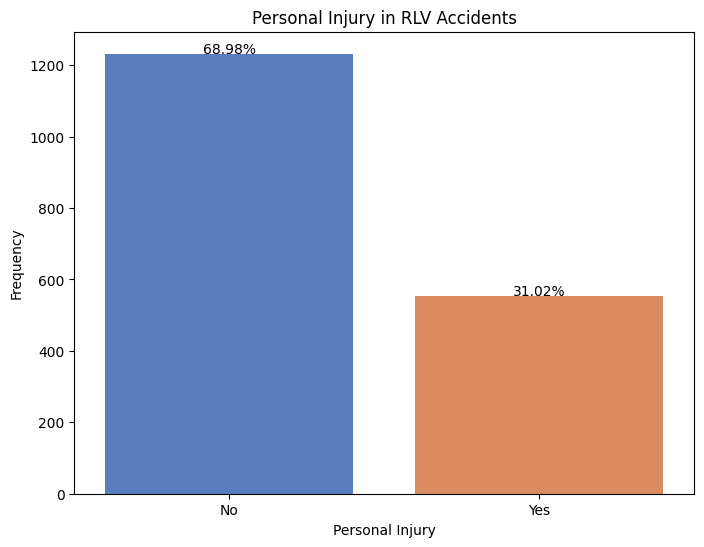

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Personal Injury', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Personal Injury')
plt.ylabel('Frequency')
plt.title('Personal Injury in RLV Accidents')

plt.show()


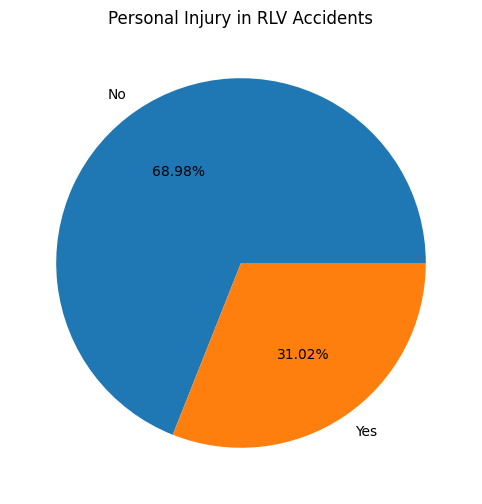

In [11]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Accident['Personal Injury'].value_counts(), labels=red_Accident['Personal Injury'].value_counts().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Personal Injury in RLV Accidents')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2051398260.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  red_Injury_Accident['Time Of Stop'] = pd.to_datetime(red_Injury_Accident['Time Of Stop'])
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2051398260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_Injury_Accident['Time Of Stop'] = pd.to_datetime(red_Injury_Accident['Time Of Stop'])
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2051398260.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

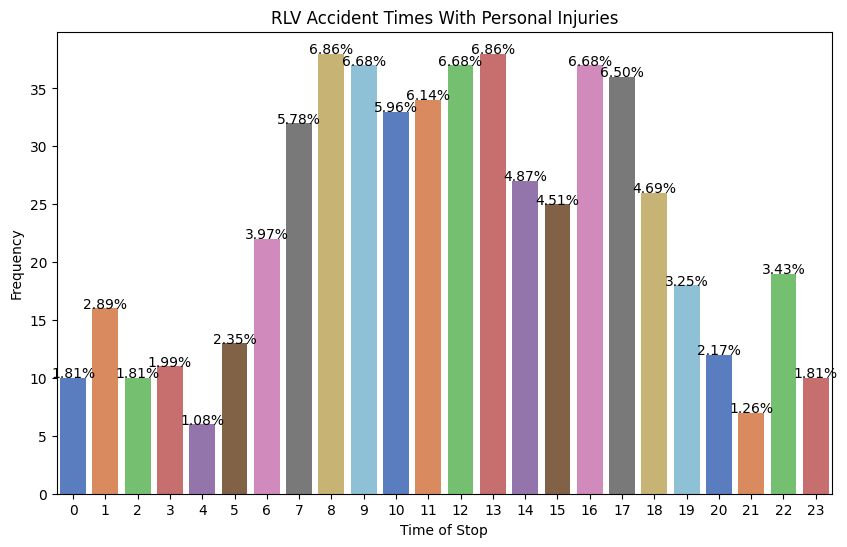

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

red_Injury_Accident = red_Accident[red_Accident['Personal Injury'].str.contains('Yes', case=False)]

plt.figure(figsize=(10, 6))
red_Injury_Accident['Time Of Stop'] = pd.to_datetime(red_Injury_Accident['Time Of Stop'])
red_Injury_Accident['Time of Stop Hour'] = red_Injury_Accident['Time Of Stop'].dt.round('H').dt.hour

ax2 = sns.countplot(x='Time of Stop Hour', data=red_Injury_Accident, palette='muted')

total2 = len(red_Injury_Accident)
for p in ax2.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total2)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax2.annotate(percentage, (x, y), ha='center')

plt.xlabel('Time of Stop')
plt.ylabel('Frequency')
plt.title('RLV Accident Times With Personal Injuries')
plt.show()


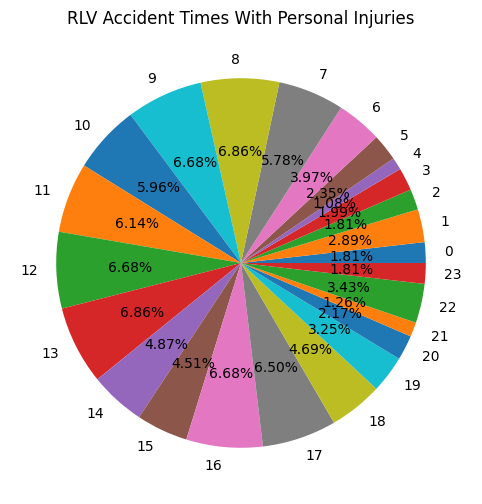

In [13]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Injury_Accident['Time of Stop Hour'].value_counts().sort_index(), labels=red_Injury_Accident['Time of Stop Hour'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('RLV Accident Times With Personal Injuries')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\814622784.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_Injury_Accident['Month'] = pd.to_datetime(red_Injury_Accident['Date Of Stop']).dt.month
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\814622784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='Month', data=red_Injury_Accident, palette='muted')


Text(0.5, 1.0, 'RLV Accident Months With Personal Injuries')

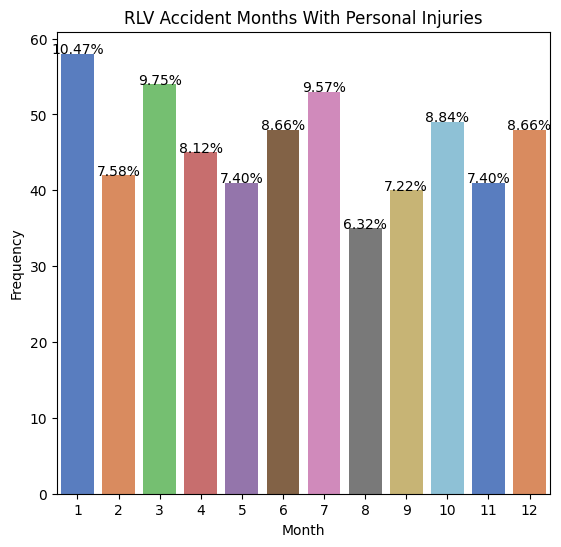

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))

red_Injury_Accident['Month'] = pd.to_datetime(red_Injury_Accident['Date Of Stop']).dt.month

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Month', data=red_Injury_Accident, palette='muted')
total1 = len(red_Injury_Accident)
for p in ax1.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total1)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02
    ax1.annotate(percentage, (x, y), ha='center')

plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('RLV Accident Months With Personal Injuries')

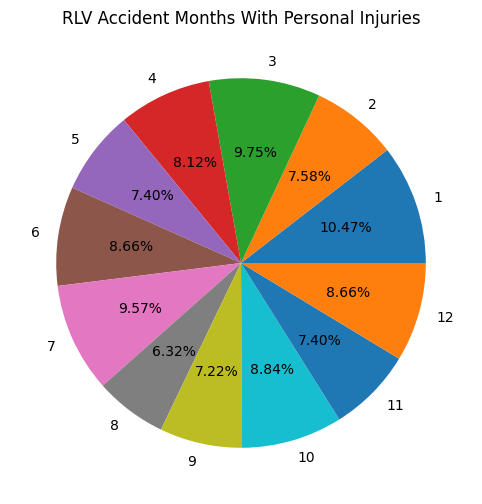

In [15]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Injury_Accident['Month'].value_counts().sort_index(), labels=red_Injury_Accident['Month'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('RLV Accident Months With Personal Injuries')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2614413118.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_Injury_Accident['Year'] = pd.to_datetime(red_Injury_Accident['Date Of Stop']).dt.year
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2614413118.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='Year', data=red_Injury_Accident, palette='muted')


Text(0.5, 1.0, 'RLV Accident Years With Personal Injuries')

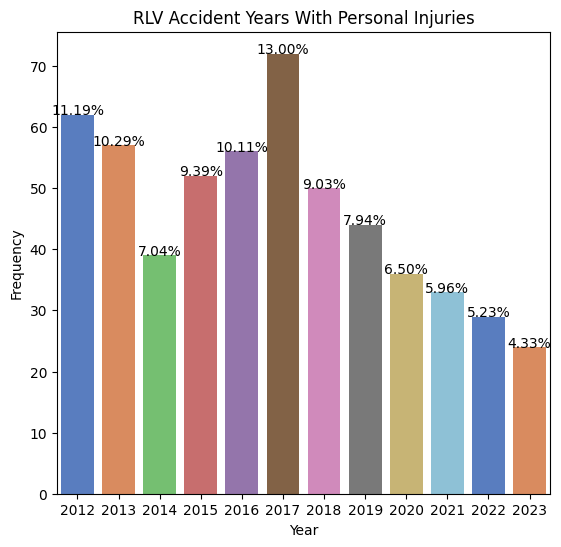

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 6))

red_Injury_Accident['Year'] = pd.to_datetime(red_Injury_Accident['Date Of Stop']).dt.year

plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Year', data=red_Injury_Accident, palette='muted')
total1 = len(red_Injury_Accident)
for p in ax1.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total1)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02
    ax1.annotate(percentage, (x, y), ha='center')

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('RLV Accident Years With Personal Injuries')

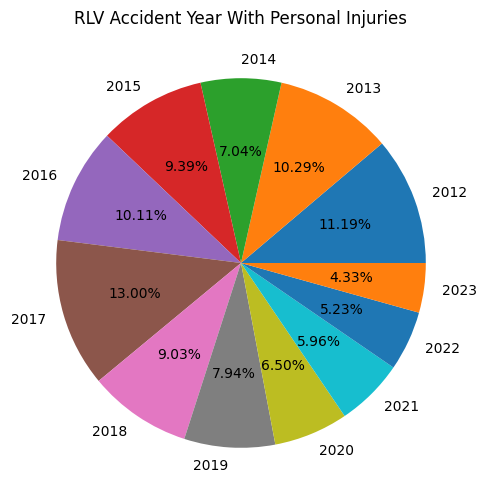

In [17]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Injury_Accident['Year'].value_counts().sort_index(), labels=red_Injury_Accident['Year'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('RLV Accident Year With Personal Injuries')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\3587726025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_Injury_Accident['Day of Week'] = pd.to_datetime(red_Injury_Accident['Date Of Stop']).dt.dayofweek + 1
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\3587726025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x='Day of Week', data=red_Injury_Accident, palette='muted')


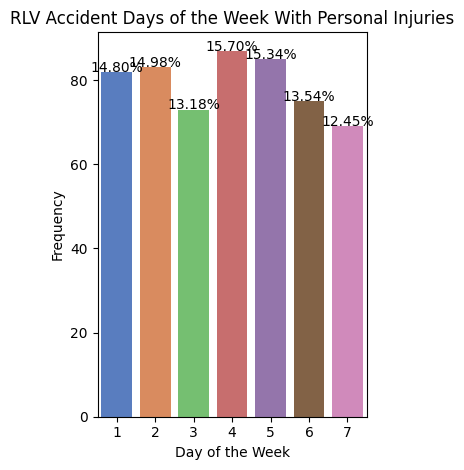

In [18]:
red_Injury_Accident['Day of Week'] = pd.to_datetime(red_Injury_Accident['Date Of Stop']).dt.dayofweek + 1
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Day of Week', data=red_Injury_Accident, palette='muted')
total2 = len(red_Injury_Accident)
for p in ax2.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total2)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02
    ax2.annotate(percentage, (x, y), ha='center')

plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title('RLV Accident Days of the Week With Personal Injuries')

plt.tight_layout()
plt.show()
# starts tuesday to monday

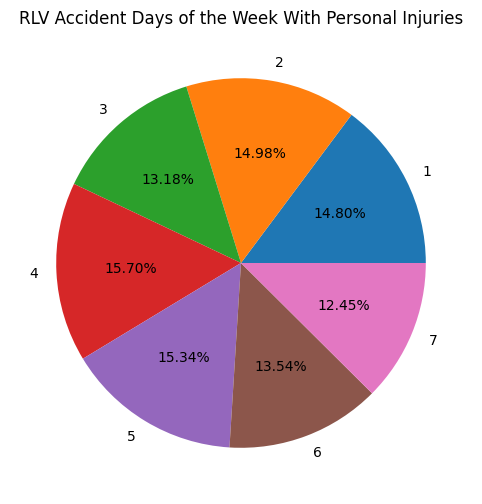

In [19]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Injury_Accident['Day of Week'].value_counts().sort_index(), labels=red_Injury_Accident['Day of Week'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('RLV Accident Days of the Week With Personal Injuries')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\1493459636.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Belts', data=red_Accident, palette='muted')


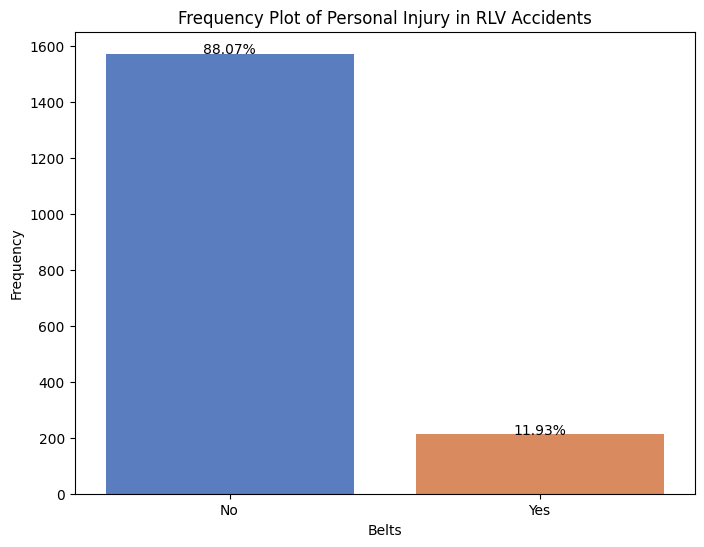

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Belts', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Belts')
plt.ylabel('Frequency')
plt.title('Frequency Plot of Personal Injury in RLV Accidents')

plt.show()

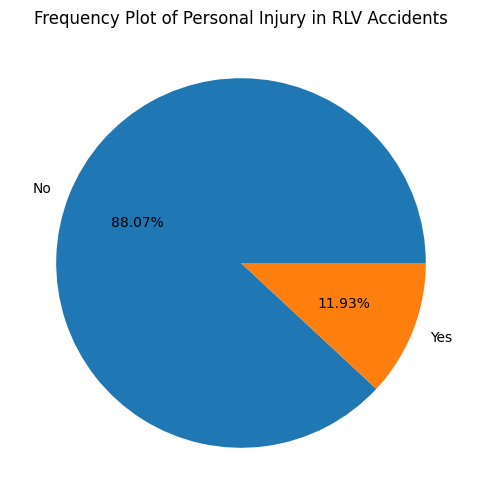

In [21]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Accident['Belts'].value_counts().sort_index(), labels=red_Accident['Belts'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Frequency Plot of Personal Injury in RLV Accidents')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\3803694310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Belts', data=red_Injury_Accident, palette='muted')


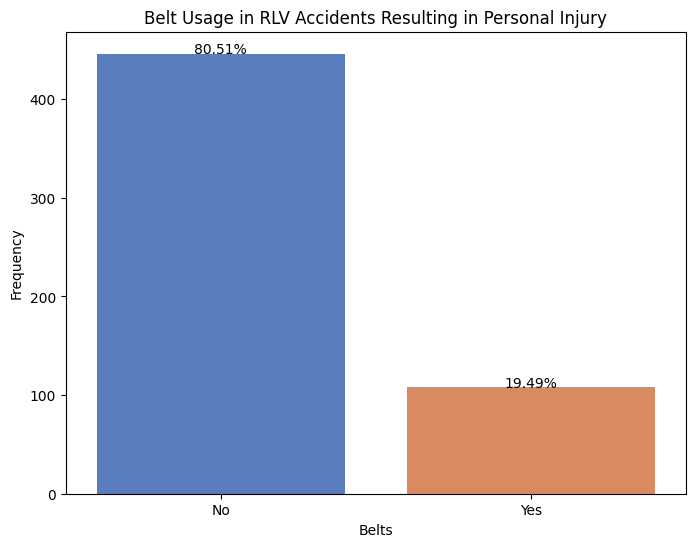

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Belts', data=red_Injury_Accident, palette='muted')
total = len(red_Injury_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Belts')
plt.ylabel('Frequency')
plt.title('Belt Usage in RLV Accidents Resulting in Personal Injury')

plt.show()

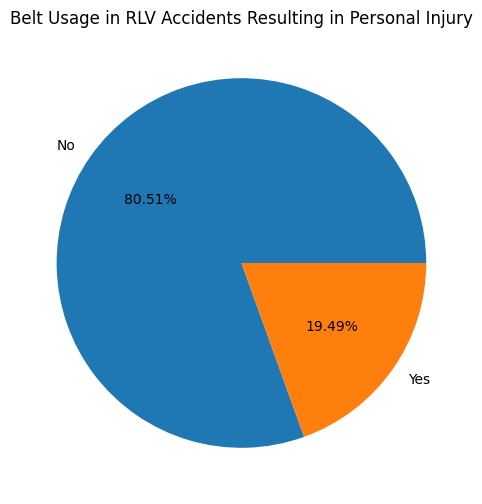

In [23]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Injury_Accident['Belts'].value_counts().sort_index(), labels=red_Injury_Accident['Belts'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Belt Usage in RLV Accidents Resulting in Personal Injury')
plt.show()

In [24]:
red_No_Injury_Accident = red_Accident[red_Accident['Personal Injury'].str.contains('No', case=False)]

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\150399870.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Belts', data=red_No_Injury_Accident, palette='muted')


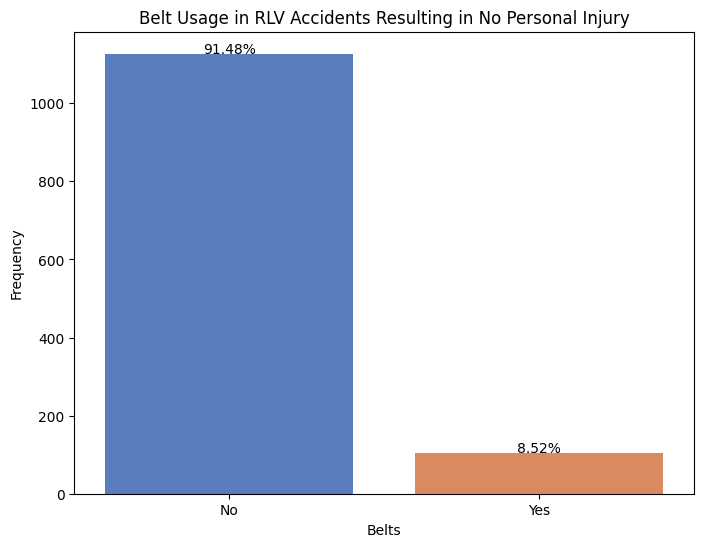

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Belts', data=red_No_Injury_Accident, palette='muted')
total = len(red_No_Injury_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Belts')
plt.ylabel('Frequency')
plt.title('Belt Usage in RLV Accidents Resulting in No Personal Injury')

plt.show()

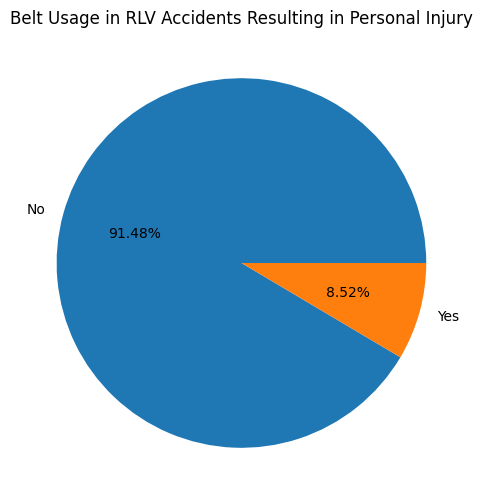

In [26]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_No_Injury_Accident['Belts'].value_counts().sort_index(), labels=red_No_Injury_Accident['Belts'].value_counts().sort_index().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Belt Usage in RLV Accidents Resulting in Personal Injury')
plt.show()

In [27]:
red_Accident['Alcohol'].value_counts()

Alcohol
No     1784
Yes       2
Name: count, dtype: int64

In [28]:
red_Accident['Work Zone'].value_counts()

Work Zone
No    1786
Name: count, dtype: int64

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\501911243.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Color', data=red_Accident, palette='muted')


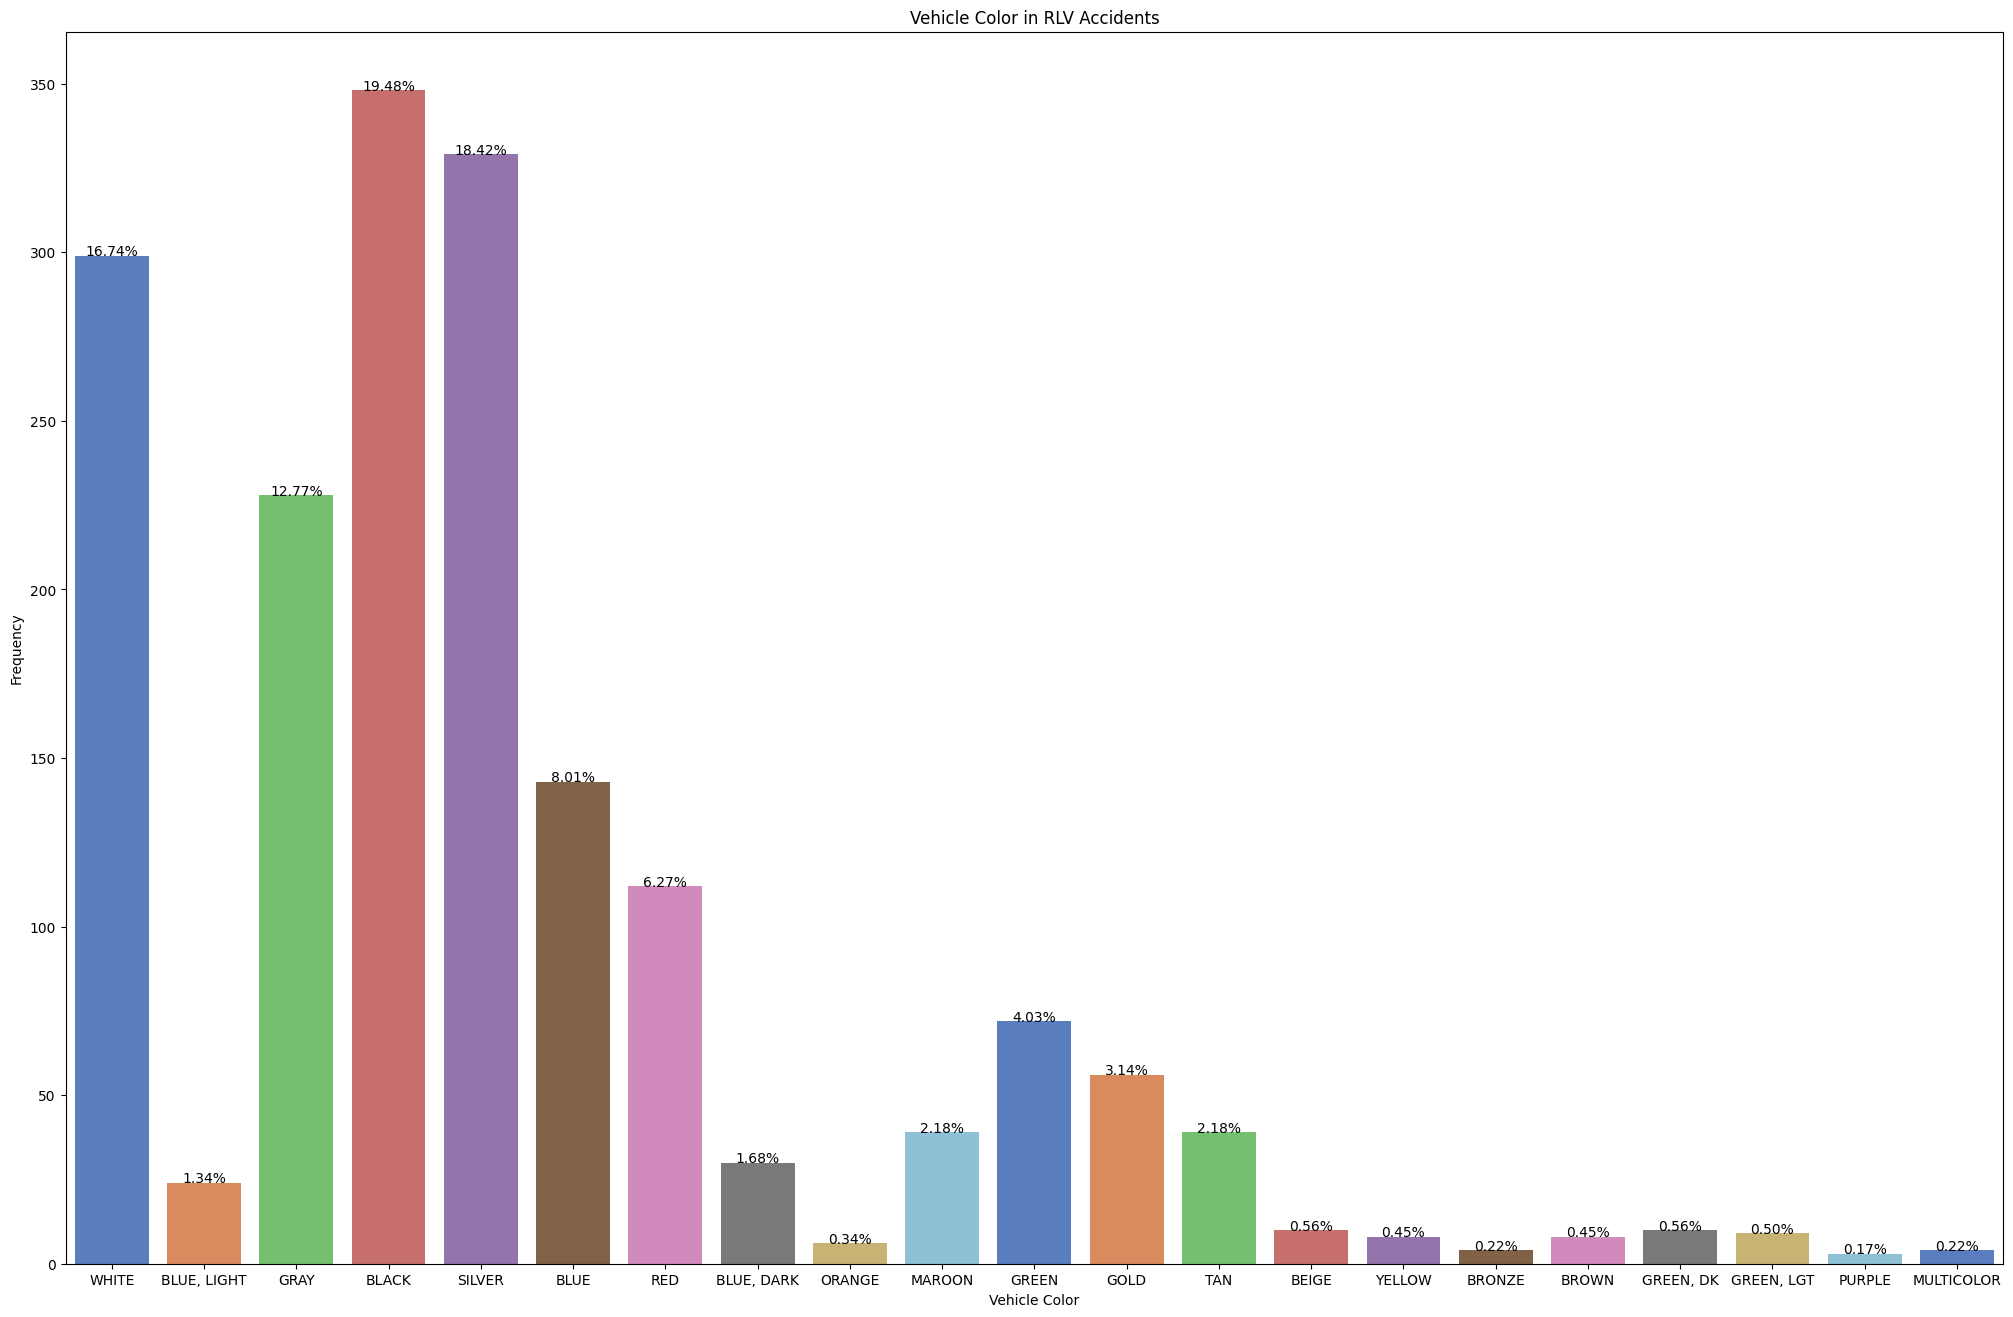

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 16))

ax = sns.countplot(x='Color', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Vehicle Color')
plt.ylabel('Frequency')
plt.title('Vehicle Color in RLV Accidents')

plt.show()

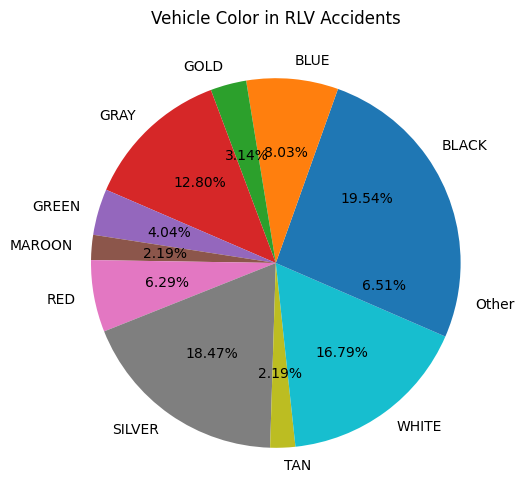

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

threshold = 2  
colors = red_Accident['Color'].value_counts().sort_index().index
counts = red_Accident['Color'].value_counts().sort_index()

mask = counts / counts.sum() * 100 < threshold
other_count = counts[mask].sum()

counts = counts[~mask]
counts['Other'] = other_count
labels = counts.index

plt.figure(figsize=(8, 6))

ax_pie = plt.pie(counts, labels=labels, autopct=lambda p: '{:.2f}%'.format(p))

plt.title('Vehicle Color in RLV Accidents')
plt.show()


C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\3185174332.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Race', data=red_Accident, palette='muted')


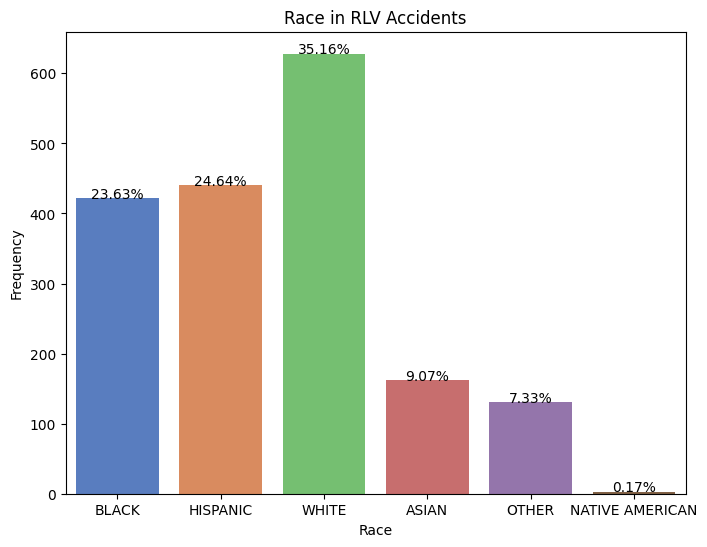

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Race', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Race in RLV Accidents')

plt.show()

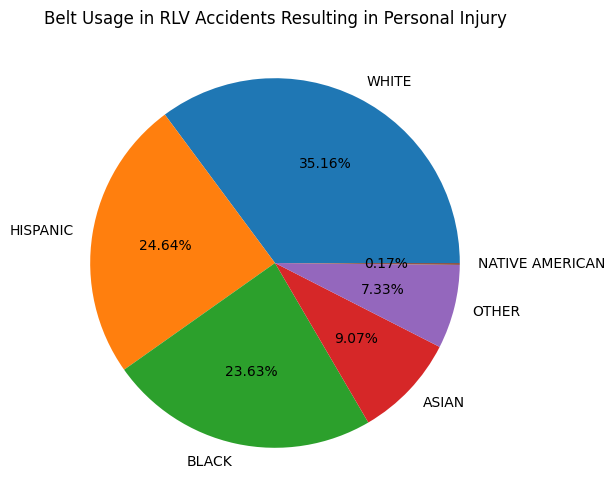

In [32]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Accident['Race'].value_counts(), labels=red_Accident['Race'].value_counts().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Belt Usage in RLV Accidents Resulting in Personal Injury')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\1754887037.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=red_Accident, palette='muted')


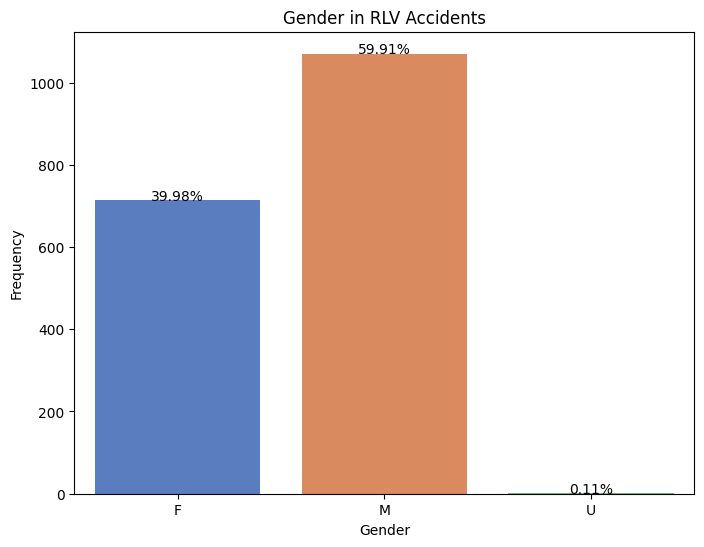

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Gender', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender in RLV Accidents')

plt.show()

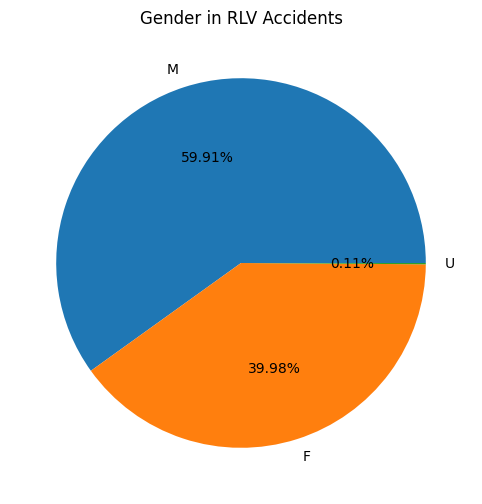

In [34]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Accident['Gender'].value_counts(), labels=red_Accident['Gender'].value_counts().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Gender in RLV Accidents')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\416853065.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Fatal', data=red_Accident, palette='muted')


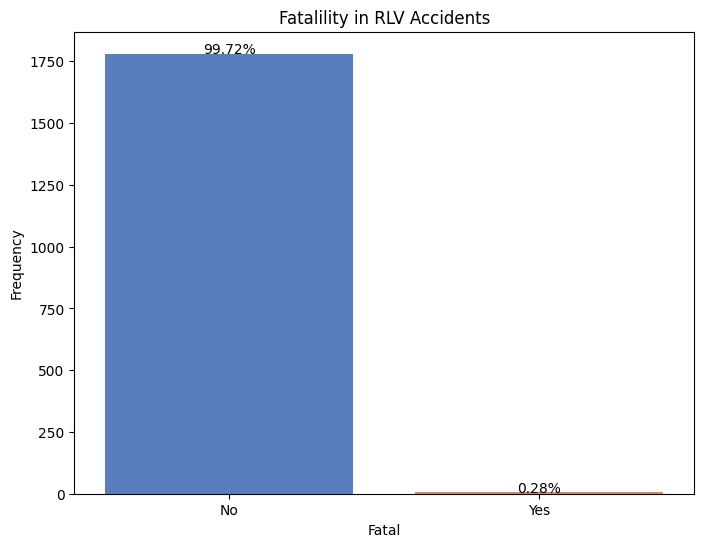

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Fatal', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Fatal')
plt.ylabel('Frequency')
plt.title('Fatalility in RLV Accidents')

plt.show()

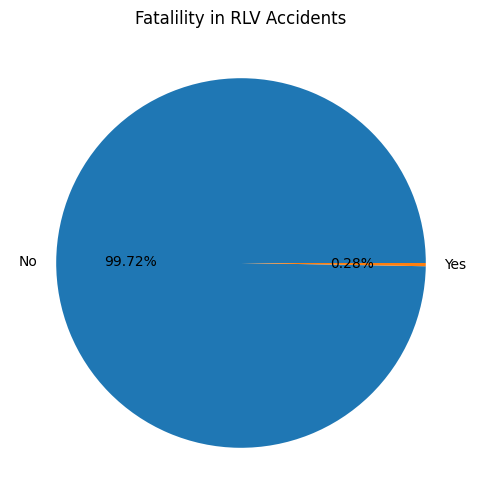

In [36]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Accident['Fatal'].value_counts(), labels=red_Accident['Fatal'].value_counts().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Fatalility in RLV Accidents')
plt.show()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\2033498962.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Property Damage', data=red_Accident, palette='muted')


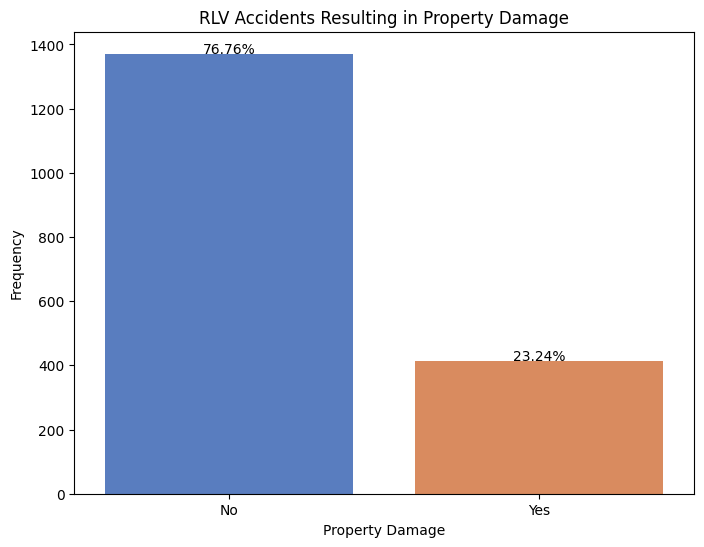

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Property Damage', data=red_Accident, palette='muted')
total = len(red_Accident)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.2f}%'.format(100 * height / total)
    x = p.get_x() + p.get_width() / 2
    y = height + 0.02 
    ax.annotate(percentage, (x, y), ha='center')

plt.xlabel('Property Damage')
plt.ylabel('Frequency')
plt.title('RLV Accidents Resulting in Property Damage')

plt.show()

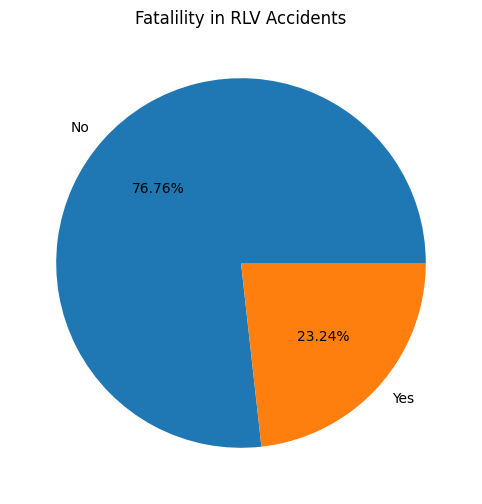

In [38]:
plt.figure(figsize=(8, 6))
ax_pie = plt.pie(red_Accident['Property Damage'].value_counts(), labels=red_Accident['Property Damage'].value_counts().index, autopct=lambda p: '{:.2f}%'.format(p))
plt.title('Fatalility in RLV Accidents')
plt.show()

In [39]:
red_Accident.columns

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')

In [40]:
Red_df['Property Damage'].value_counts()

Property Damage
No     102171
Yes       767
Name: count, dtype: int64

In [41]:
Red_df['Alcohol'].value_counts()

Alcohol
No     102918
Yes        20
Name: count, dtype: int64

In [42]:
Red_df['Accident'].value_counts()

Accident
No     101152
Yes      1786
Name: count, dtype: int64

In [43]:
Red_df['Fatal'].value_counts()


Fatal
No     102916
Yes        22
Name: count, dtype: int64

In [44]:
Red_df['Description'].value_counts()

Description
DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED SIGNAL                            21716
DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SIGNAL STOP LINE                    18277
DRIVER ENTERING INTERSECTION AT FLASHING RED TRAFFIC SIGNAL WITHOUT STOPPING    14189
FAILURE TO EQUIP VEH. WITH REQUIRED REAR STOP LAMP                              13966
DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFORE RIGHT TURN                      8121
                                                                                ...  
MOTOR VEH. RIGHT BRAKE LIGHT OUT W/O REQUIRED STOP LAMPS EQUIPMENT                  1
DRIVER FAIL TO MAKE REQUIRED STOP AT SIGNAL/ SIGN                                   1
DRIVER FAIL TO MAKE REQUIRED STOP AT  PAVEMENT MARK)                                1
DRIVER FAILING TO STOP AT RED SIGNAL BEFORE U TURN                                  1
OPERATE MOTOR VEH ON HWY WITHOUT REQUIRED STOP LAMP                                 1
Name: count, Length: 248, dtype: int64

In [45]:
Red_df['Accident'].value_counts()

Accident
No     101152
Yes      1786
Name: count, dtype: int64

In [46]:
Red_Accident=Red_df[Red_df['Accident'].str.contains('Yes', case=False)]

In [47]:
Red_Accident['Personal Injury'].value_counts()

Personal Injury
No     1232
Yes     554
Name: count, dtype: int64

In [48]:
Red_Accident['Fatal'].value_counts()

Fatal
No     1781
Yes       5
Name: count, dtype: int64

In [49]:
Red_Accident=Red_Accident

In [50]:
Red_Accident['DV']= ((Red_Accident['Fatal']=='Yes') | (Red_Accident['Personal Injury']=='Yes')).astype(int)

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\889480092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Red_Accident['DV']= ((Red_Accident['Fatal']=='Yes') | (Red_Accident['Personal Injury']=='Yes')).astype(int)


In [52]:
Red_Accident['DV'].value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [53]:
Red_Accident['DATE'] = Red_Accident['Date Of Stop'] +" "+ Red_Accident['Time Of Stop']
Red_Accident['DATE'] =pd.to_datetime(Red_Accident['DATE'], dayfirst=True)
Red_Accident['DATE'] = Red_Accident['DATE'].dt.round('H')
Red_Accident = Red_Accident.drop(['Date Of Stop', 'Time Of Stop'], axis=1)

C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\4177135973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Red_Accident['DATE'] = Red_Accident['Date Of Stop'] +" "+ Red_Accident['Time Of Stop']
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\4177135973.py:2: UserWarning: Parsing dates in %m/%d/%Y %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  Red_Accident['DATE'] =pd.to_datetime(Red_Accident['DATE'], dayfirst=True)
C:\Users\ishaq\AppData\Local\Temp\ipykernel_11948\4177135973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [54]:
soonest_date = Red_Accident['DATE'].min()
oldest_date = Red_Accident['DATE'].max()

print("Soonest Date:", soonest_date)
print("Oldest Date:", oldest_date)

Soonest Date: 2012-01-05 12:00:00
Oldest Date: 2023-09-27 22:00:00


In [55]:
Red_Accident['DV'].value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [56]:
Red_Accident

,SeqID,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,...,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,DV,DATE
16,d0c53876-4da4-4922-ac4f-d5a7e91c7bcc,MCP,"3rd District, Silver Spring",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,FENTON ST @ COLESVILLE RD,38.997645,-77.027105,Yes,No,No,...,True,BLACK,F,COLUMBIA,MD,MD,A - Marked Patrol,"(38.997645, -77.027105)",0,2023-04-30 03:00:00
398,e5619336-680c-4533-8055-ba7d79eec1e1,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,ROCKVILLE PIKE / POOKS HILL RD,38.997566,-77.109724,Yes,No,Yes,...,True,HISPANIC,M,LANHAM,MD,MD,A - Marked Patrol,"(38.9975661666667, -77.1097243333333)",1,2023-05-02 12:00:00
2798,1ded33ce-acea-41c9-ae81-161af71d56e2,MCP,Headquarters and Special Operations,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,NB RT355 @ LITTLE SENECA PKWY,39.223205,-77.260313,Yes,No,No,...,True,BLACK,F,CLARKSBURG,MD,MD,A - Marked Patrol,"(39.223205, -77.2603133333333)",0,2023-05-16 10:00:00
3006,b63e7cdb-fd9c-4c13-8728-8ae166a5260a,MCP,"3rd District, Silver Spring",DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,COLUMBIA PIKE / TECH RD,39.057987,-76.968677,Yes,No,Yes,...,True,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0579866666667, -76.9686766666667)",1,2023-05-17 14:00:00
3366,973068ac-ab88-460a-8d82-9d2d80041890,MCP,"3rd District, Silver Spring",DRIVER FAIL TO STOP AT STEADY CIRCULAR RED SIGNAL,SPRING ST @ COLEVILLE RD,38.999282,-77.026098,Yes,No,No,...,True,HISPANIC,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(38.9992823333333, -77.0260978333333)",0,2023-05-20 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853409,cdd9b30e-9c82-471b-aec5-77cfdd182d37,MCP,"4th District, Wheaton",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,BOWIE MILL ROAD @ CASHELL ROAD,0.000000,0.000000,Yes,No,No,...,True,ASIAN,M,OLNEY,MD,MD,A - Marked Patrol,"(0.0, 0.0)",0,2013-09-17 02:00:00
1854806,116fd1e4-0a9c-4cc1-b147-866974780e6b,MCP,"4th District, Wheaton",MOTOR VEH W/O REQUIRED STOP LAMPS EQUIPMENT,CONNECTICUT AVE @ ASPEN HILL ROAD,0.000000,0.000000,Yes,No,No,...,True,WHITE,M,POTOMAC,MD,MD,A - Marked Patrol,"(0.0, 0.0)",0,2013-09-25 02:00:00
1859831,569ca511-ce44-4b97-aad3-783c36172735,MCP,"4th District, Wheaton",DRIVER FAIL TO STOP AT FLASHING RED TRAFFIC SI...,CASHELL ROAD @ MORNINGWOOD DRIVE,0.000000,0.000000,Yes,No,No,...,True,WHITE,M,OLNEY,MD,MD,A - Marked Patrol,"(0.0, 0.0)",0,2013-09-19 02:00:00
1861398,d81c6100-f5c4-4451-950a-c7482cad81e5,MCP,"4th District, Wheaton",MOTOR VEH. W/O REQUIRED STOP LAMPS EQUIPMENT,GEORGIA AVE @ HINES ROAD,39.144320,-77.067415,Yes,No,No,...,True,WHITE,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.14432, -77.067415)",0,2014-12-17 23:00:00


In [57]:
Red_Accident.to_csv('../data/Traffic_Violations/Traffic_violations_Reduced.csv', index=False)